# Task 23: Linear Regression

Weights: 0.8717537758865828, Bias: 1.9873436014274431e-16


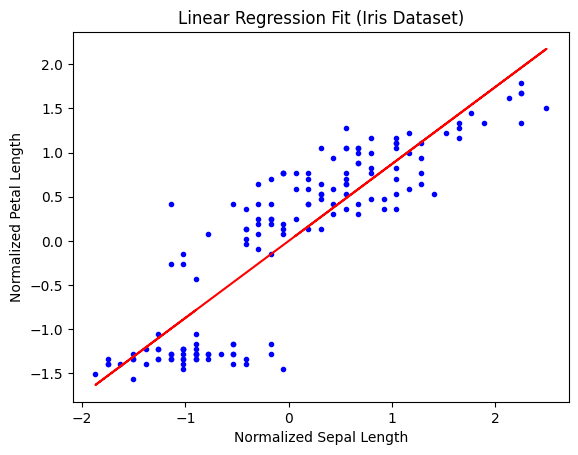

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
#using sepal length and petal length only
X = iris.data[:, 0:1]  
y = iris.data[:, 2:3]  

#normalisation
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

#adding bias by adding a column of ones 
X_b = np.c_[np.ones((X.shape[0], 1)), X]

learning_rate = 0.1
n_iterations = 1000
m = X.shape[0] 
theta = np.random.randn(2, 1)

def predict(X, theta):
    return X.dot(theta)

#mean squared error function used to calculate loss
def compute_cost(y, y_pred):
    return (1/(2*m)) * np.sum(np.square(y_pred - y))

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    for iteration in range(n_iterations):
        gradients = 1/m * X.T.dot(predict(X, theta) - y)
        theta -= learning_rate * gradients
    return theta

theta = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

print(f"Weights: {theta[1][0]}, Bias: {theta[0][0]}")
plt.plot(X, y, "b.")
plt.plot(X, predict(X_b, theta), "r-")
plt.xlabel("Normalized Sepal Length")
plt.ylabel("Normalized Petal Length")
plt.title("Linear Regression Fit (Iris Dataset)")
plt.show()
